In [1]:
# import needed libraries
import pandas as pd
import mysql.connector


In [2]:
# Read the cleaned CSV
df = pd.read_csv("cleaned_agriculture_data.csv")

In [3]:
df

,dist_code,year,state_code,state_name,dist_name,rice_area,rice_production,rice_yield,wheat_area,wheat_production,...,sugarcane_yield,cotton_area,cotton_production,cotton_yield,fruits_area,vegetables_area,fruits_vegetables_area,potatoes_area,onion_area,fodder_area
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [4]:
# connect with SQL

connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345678",  
)

cursor = connection.cursor()

In [5]:
# Drop the database if it exists
cursor.execute("DROP DATABASE IF EXISTS AgriData")

In [6]:
# Create the database
cursor.execute("CREATE DATABASE AgriData")

In [7]:
# Switch to using the new database
cursor.execute("USE AgriData")

In [8]:
# Create the table
column_definitions = """
    dist_code INT,
    year INT,
    state_code INT,
    state_name VARCHAR(100),
    dist_name VARCHAR(100),
    rice_area FLOAT,
    rice_production FLOAT,
    rice_yield FLOAT,
    wheat_area FLOAT,
    wheat_production FLOAT,
    wheat_yield FLOAT,
    kharif_sorghum_area FLOAT,
    kharif_sorghum_production FLOAT,
    kharif_sorghum_yield FLOAT,
    rabi_sorghum_area FLOAT,
    rabi_sorghum_production FLOAT,
    rabi_sorghum_yield FLOAT,
    sorghum_area FLOAT,
    sorghum_production FLOAT,
    sorghum_yield FLOAT,
    pearl_millet_area FLOAT,
    pearl_millet_production FLOAT,
    pearl_millet_yield FLOAT,
    maize_area FLOAT,
    maize_production FLOAT,
    maize_yield FLOAT,
    finger_millet_area FLOAT,
    finger_millet_production FLOAT,
    finger_millet_yield FLOAT,
    barley_area FLOAT,
    barley_production FLOAT,
    barley_yield FLOAT,
    chickpea_area FLOAT,
    chickpea_production FLOAT,
    chickpea_yield FLOAT,
    pigeonpea_area FLOAT,
    pigeonpea_production FLOAT,
    pigeonpea_yield FLOAT,
    minor_pulses_area FLOAT,
    minor_pulses_production FLOAT,
    minor_pulses_yield FLOAT,
    groundnut_area FLOAT,
    groundnut_production FLOAT,
    groundnut_yield FLOAT,
    sesamum_area FLOAT,
    sesamum_production FLOAT,
    sesamum_yield FLOAT,
    rapeseed_mustard_area FLOAT,
    rapeseed_mustard_production FLOAT,
    rapeseed_mustard_yield FLOAT,
    safflower_area FLOAT,
    safflower_production FLOAT,
    safflower_yield FLOAT,
    castor_area FLOAT,
    castor_production FLOAT,
    castor_yield FLOAT,
    linseed_area FLOAT,
    linseed_production FLOAT,
    linseed_yield FLOAT,
    sunflower_area FLOAT,
    sunflower_production FLOAT,
    sunflower_yield FLOAT,
    soyabean_area FLOAT,
    soyabean_production FLOAT,
    soyabean_yield FLOAT,
    oilseeds_area FLOAT,
    oilseeds_production FLOAT,
    oilseeds_yield FLOAT,
    sugarcane_area FLOAT,
    sugarcane_production FLOAT,
    sugarcane_yield FLOAT,
    cotton_area FLOAT,
    cotton_production FLOAT,
    cotton_yield FLOAT,
    fruits_area FLOAT,
    vegetables_area FLOAT,
    fruits_vegetables_area FLOAT,
    potatoes_area FLOAT,
    onion_area FLOAT,
    fodder_area FLOAT
"""

cursor.execute(f"CREATE TABLE ProductionData ({column_definitions})")


In [9]:
# Insert data into table
columns = ",".join(df.columns)
placeholders = ",".join(["%s"] * len(df.columns))
insert_query = f"INSERT INTO ProductionData ({columns}) VALUES ({placeholders})"

# Convert DataFrame to list of tuples
data = [tuple(x) for x in df.to_numpy()]

# Batch insert
cursor.executemany(insert_query, data)

In [ ]:
# Commit changes
connection.commit()


In [13]:
# To verify the push into SQL
cursor.execute("SELECT COUNT(*) FROM ProductionData")
row_count = cursor.fetchone()[0]
print(f"Total Rows: {row_count}")


Total Rows: 16146


In [14]:
# To verify the push into SQL
cursor.execute("DESCRIBE ProductionData")
columns = cursor.fetchall()
column_names = [col[0] for col in columns]
print(f"Total Columns: {len(column_names)}")
print("Column Names:")
print(column_names)


Total Columns: 80
Column Names:
['dist_code', 'year', 'state_code', 'state_name', 'dist_name', 'rice_area', 'rice_production', 'rice_yield', 'wheat_area', 'wheat_production', 'wheat_yield', 'kharif_sorghum_area', 'kharif_sorghum_production', 'kharif_sorghum_yield', 'rabi_sorghum_area', 'rabi_sorghum_production', 'rabi_sorghum_yield', 'sorghum_area', 'sorghum_production', 'sorghum_yield', 'pearl_millet_area', 'pearl_millet_production', 'pearl_millet_yield', 'maize_area', 'maize_production', 'maize_yield', 'finger_millet_area', 'finger_millet_production', 'finger_millet_yield', 'barley_area', 'barley_production', 'barley_yield', 'chickpea_area', 'chickpea_production', 'chickpea_yield', 'pigeonpea_area', 'pigeonpea_production', 'pigeonpea_yield', 'minor_pulses_area', 'minor_pulses_production', 'minor_pulses_yield', 'groundnut_area', 'groundnut_production', 'groundnut_yield', 'sesamum_area', 'sesamum_production', 'sesamum_yield', 'rapeseed_mustard_area', 'rapeseed_mustard_production', 'rap

---
## SQL Querying


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Establish MySQL connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345678",
    database="AgriData"
)

# Function to execute SQL query and return DataFrame
def fetch_data(query):
    return pd.read_sql(query, conn)

In [17]:
# Set plot style
sns.set(style="whitegrid")

---
#### 1. Year-wise Trend of Rice Production Across States (Top 3)

C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


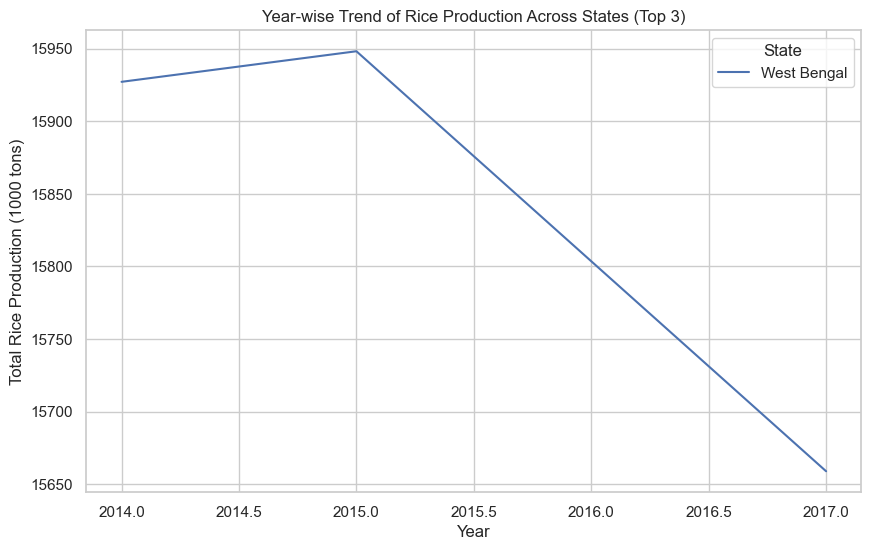

In [21]:
query1 = """
SELECT year, state_name, SUM(rice_production) AS total_rice_production
FROM ProductionData
GROUP BY year, state_name
ORDER BY total_rice_production DESC
LIMIT 3;
"""
df1 = fetch_data(query1)
df1.pivot(index='year', columns='state_name', values='total_rice_production').plot(kind='line', figsize=(10, 6))
plt.title('Year-wise Trend of Rice Production Across States (Top 3)')
plt.ylabel('Total Rice Production (1000 tons)')
plt.xlabel('Year')
plt.legend(title='State')
plt.show()

---
#### 2. Top 5 Districts by Wheat Yield Increase Over the Last 5 Years


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\abish\AppData\Local\Temp\ipykernel_6756\760478648.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='dist_name', y='yield_increase', palette='Blues_d')


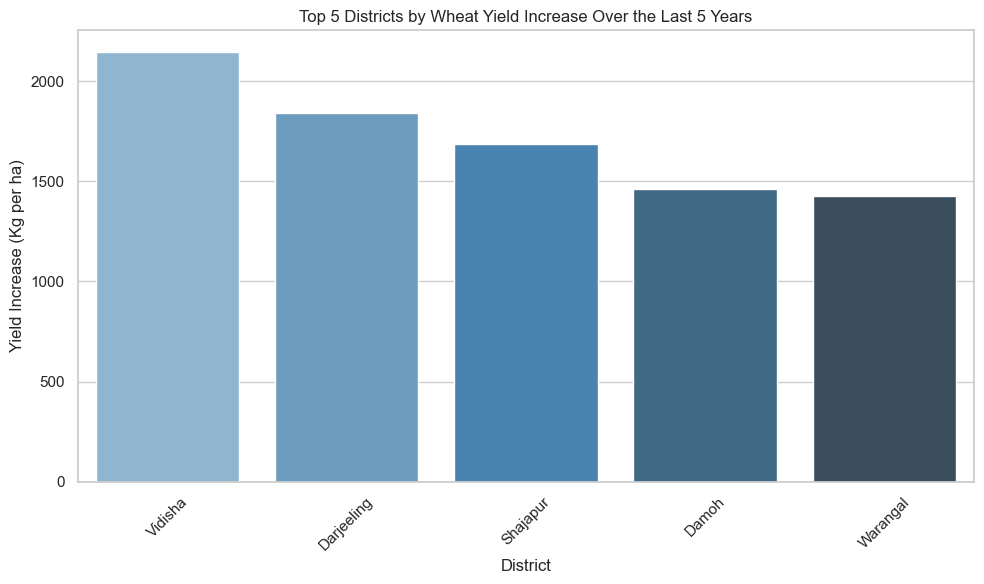

In [41]:
query2 = """
WITH last_5_years AS (
    SELECT dist_name, year, wheat_yield
    FROM ProductionData
    WHERE year >= (SELECT MAX(year) FROM ProductionData) - 5
),
yield_diff AS (
    SELECT 
        dist_name,
        MAX(CASE WHEN year = (SELECT MAX(year) FROM ProductionData) THEN wheat_yield END) AS latest_yield,
        MIN(CASE WHEN year = (SELECT MAX(year) FROM ProductionData) - 5 THEN wheat_yield END) AS yield_5y_ago
    FROM last_5_years
    GROUP BY dist_name
)
SELECT 
    dist_name,
    latest_yield,
    yield_5y_ago,
    (latest_yield - yield_5y_ago) AS yield_increase
FROM yield_diff
WHERE latest_yield IS NOT NULL AND yield_5y_ago IS NOT NULL
ORDER BY yield_increase DESC
LIMIT 5;
"""

df2 = fetch_data(query2)

# Convert yield_increase column to numeric
df2['yield_increase'] = pd.to_numeric(df2['yield_increase'], errors='coerce')

# Drop rows where yield_increase is NaN
df2 = df2.dropna(subset=['yield_increase'])

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=df2, x='dist_name', y='yield_increase', palette='Blues_d')
plt.title('Top 5 Districts by Wheat Yield Increase Over the Last 5 Years')
plt.ylabel('Yield Increase (Kg per ha)')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---
#### 3. States with the Highest Growth in Oilseed Production (5-Year Growth Rate)


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


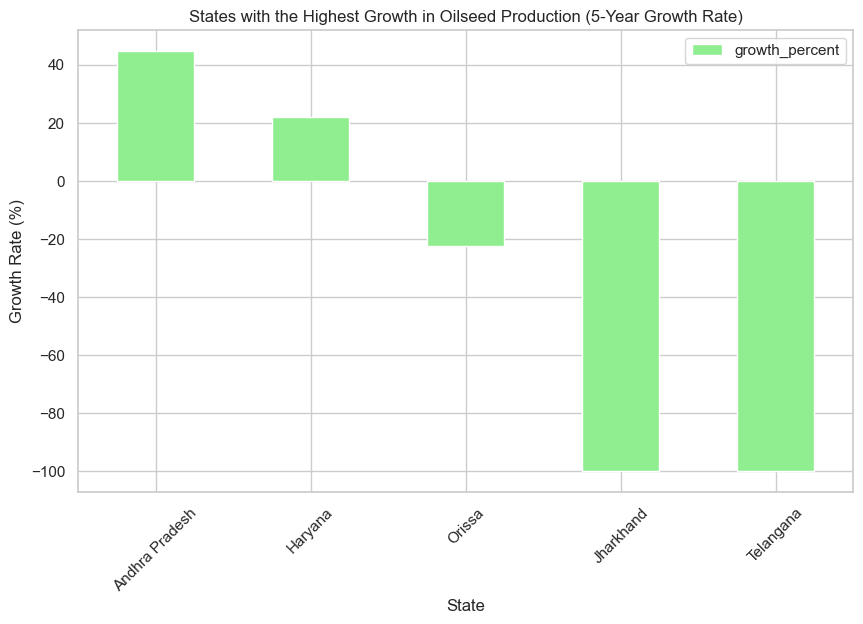

In [24]:
query3 = """
SELECT state_name,
       SUM(CASE WHEN year = (SELECT MAX(year) FROM ProductionData) THEN oilseeds_production END) AS production_latest,
       SUM(CASE WHEN year = (SELECT MAX(year) FROM ProductionData) - 5 THEN oilseeds_production END) AS production_5y_ago,
       (SUM(CASE WHEN year = (SELECT MAX(year) FROM ProductionData) THEN oilseeds_production END) - 
        SUM(CASE WHEN year = (SELECT MAX(year) FROM ProductionData) - 5 THEN oilseeds_production END)) / 
        NULLIF(SUM(CASE WHEN year = (SELECT MAX(year) FROM ProductionData) - 5 THEN oilseeds_production END), 0) * 100
        AS growth_percent
FROM ProductionData
GROUP BY state_name
ORDER BY growth_percent DESC
LIMIT 5;
"""
df3 = fetch_data(query3)
df3.plot(kind='bar', x='state_name', y='growth_percent', figsize=(10, 6), color='lightgreen')
plt.title('States with the Highest Growth in Oilseed Production (5-Year Growth Rate)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

---
#### 4. District-wise Correlation Between Area and Production for Major Crops (Rice, Wheat, Maize)


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


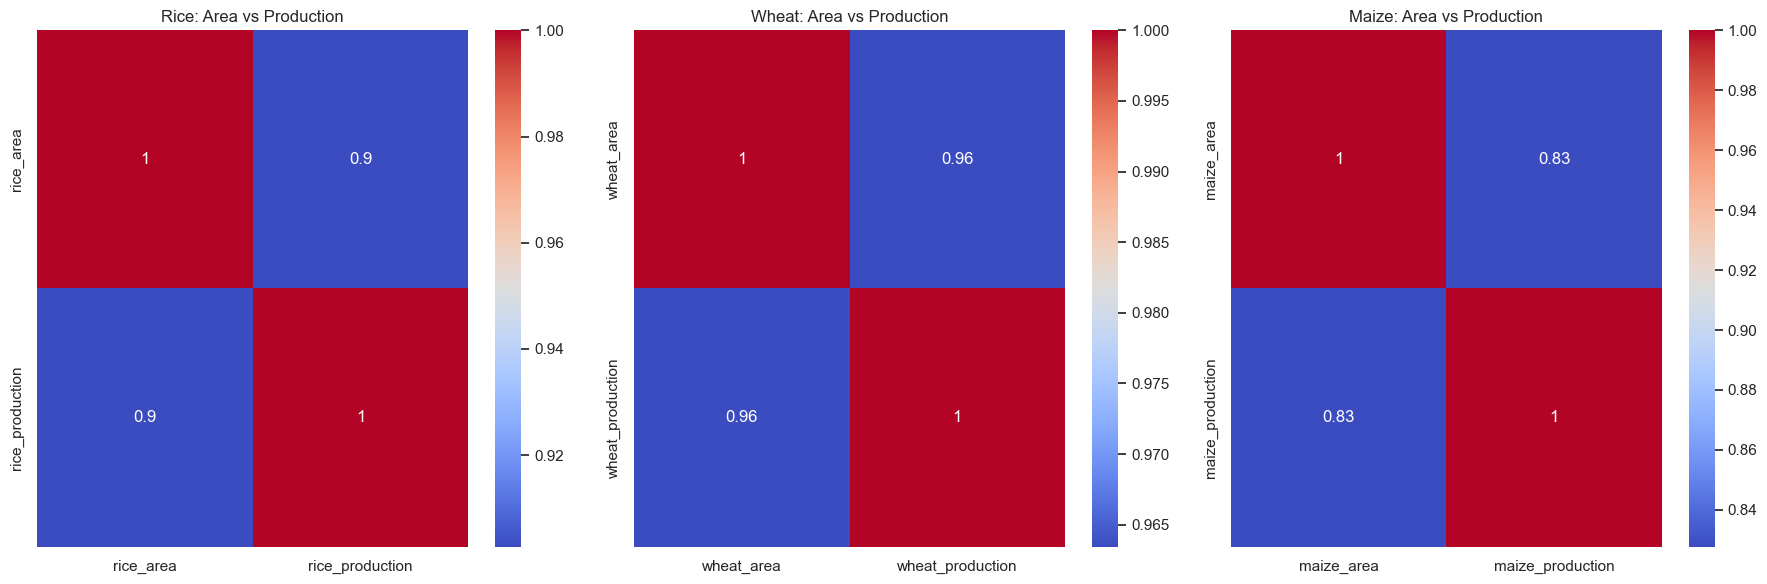

In [25]:
query4 = """
SELECT dist_name, rice_area, rice_production, wheat_area, wheat_production, maize_area, maize_production
FROM ProductionData
WHERE year >= YEAR(CURDATE()) - 10;
"""
df4 = fetch_data(query4)
corr_rice = df4[['rice_area', 'rice_production']].corr()
corr_wheat = df4[['wheat_area', 'wheat_production']].corr()
corr_maize = df4[['maize_area', 'maize_production']].corr()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(corr_rice, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Rice: Area vs Production')
sns.heatmap(corr_wheat, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Wheat: Area vs Production')
sns.heatmap(corr_maize, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Maize: Area vs Production')
plt.tight_layout()
plt.show()


---
#### 5. Yearly Production Growth of Cotton in Top 5 Cotton Producing States


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


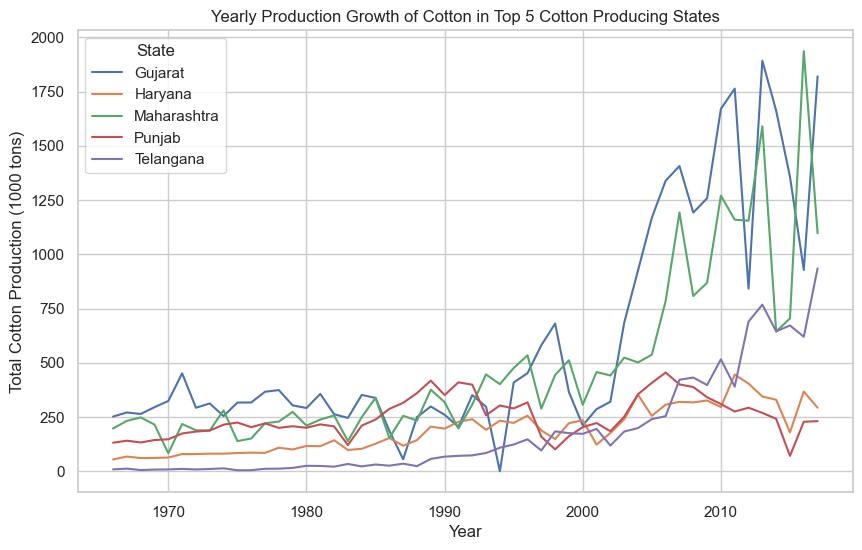

In [26]:
query5 = """
WITH top_cotton_states AS (
    SELECT state_name
    FROM ProductionData
    GROUP BY state_name
    ORDER BY SUM(cotton_production) DESC
    LIMIT 5
)
SELECT year, state_name, SUM(cotton_production) AS total_cotton_production
FROM ProductionData
WHERE state_name IN (SELECT state_name FROM top_cotton_states)
GROUP BY year, state_name
ORDER BY year, state_name;
"""
df5 = fetch_data(query5)
df5.pivot(index='year', columns='state_name', values='total_cotton_production').plot(kind='line', figsize=(10, 6))
plt.title('Yearly Production Growth of Cotton in Top 5 Cotton Producing States')
plt.ylabel('Total Cotton Production (1000 tons)')
plt.xlabel('Year')
plt.legend(title='State')
plt.show()

---
#### 6. Districts with the Highest Groundnut Production in 2010


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\abish\AppData\Local\Temp\ipykernel_6756\9623301.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df6, x='label', y='groundnut_production', palette='Oranges_d')


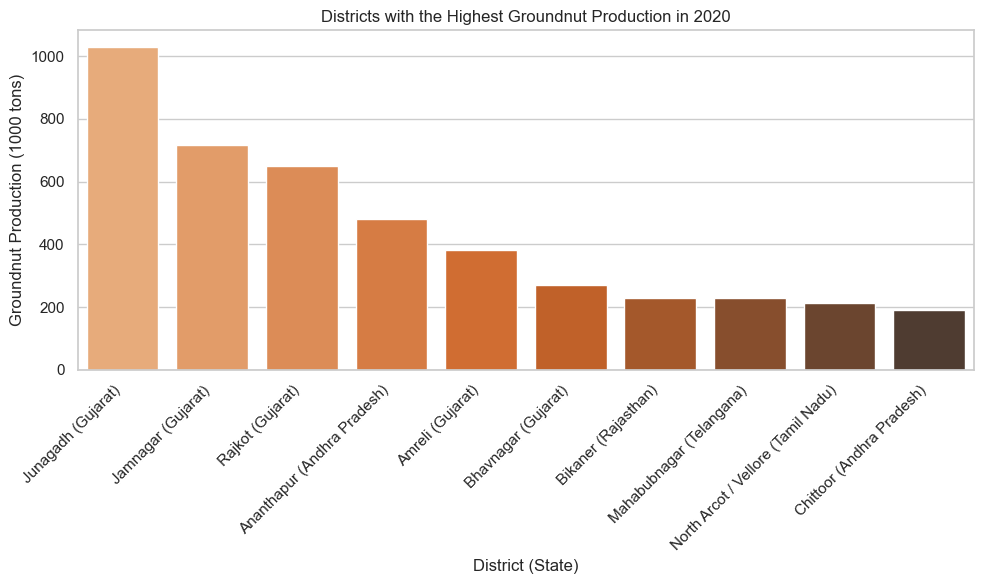

In [ ]:
query6 = """
SELECT dist_name, state_name, groundnut_production
FROM ProductionData
WHERE year = 2010 AND groundnut_production IS NOT NULL
ORDER BY groundnut_production DESC
LIMIT 10;
"""

df6 = fetch_data(query6)

# Convert 'groundnut_production' to numeric, coercing errors to NaN
df6['groundnut_production'] = pd.to_numeric(df6['groundnut_production'], errors='coerce')


# Combine 'dist_name' and 'state_name' for clearer x-axis labels
df6['label'] = df6['dist_name'] + " (" + df6['state_name'] + ")"

plt.figure(figsize=(10, 6))
sns.barplot(data=df6, x='label', y='groundnut_production', palette='Oranges_d')
plt.title('Districts with the Highest Groundnut Production in 2010')
plt.ylabel('Groundnut Production (1000 tons)')
plt.xlabel('District (State)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---
#### 7. Annual Average Maize Yield Across All States


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


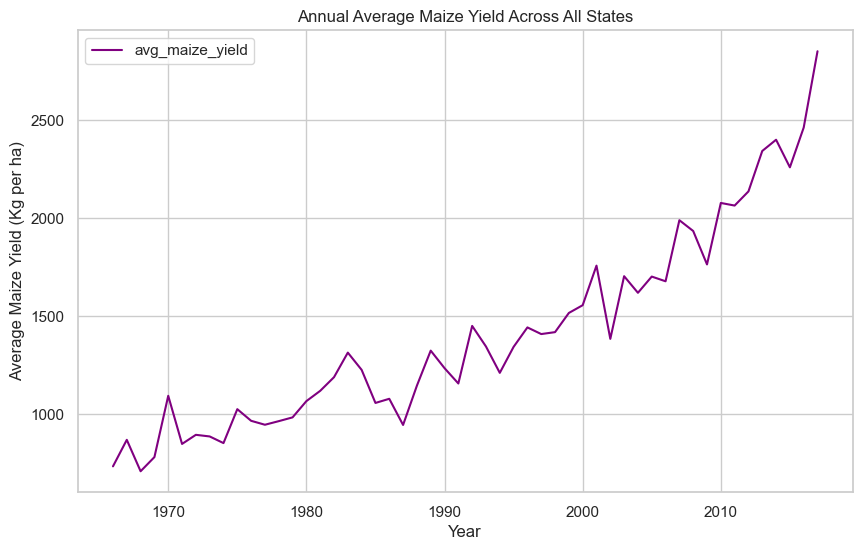

In [37]:
query7 = """
SELECT year, AVG(maize_yield) AS avg_maize_yield
FROM ProductionData
GROUP BY year
ORDER BY year;
"""
df7 = fetch_data(query7)
df7.plot(kind='line', x='year', y='avg_maize_yield', figsize=(10, 6), color='purple')
plt.title('Annual Average Maize Yield Across All States')
plt.ylabel('Average Maize Yield (Kg per ha)')
plt.xlabel('Year')
plt.show()

---
#### 8. Total Area Cultivated for Oilseeds in Each State


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


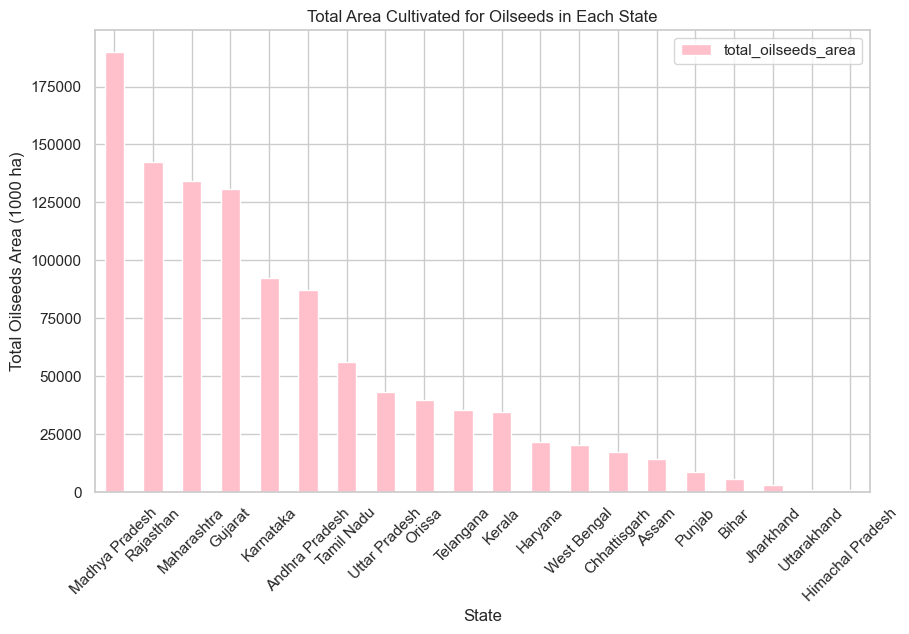

In [38]:
query8 = """
SELECT state_name, SUM(oilseeds_area) AS total_oilseeds_area
FROM ProductionData
GROUP BY state_name
ORDER BY total_oilseeds_area DESC;
"""
df8 = fetch_data(query8)
df8.plot(kind='bar', x='state_name', y='total_oilseeds_area', figsize=(10, 6), color='pink')
plt.title('Total Area Cultivated for Oilseeds in Each State')
plt.ylabel('Total Oilseeds Area (1000 ha)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

---
#### 9. Districts with the Highest Rice Yield


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


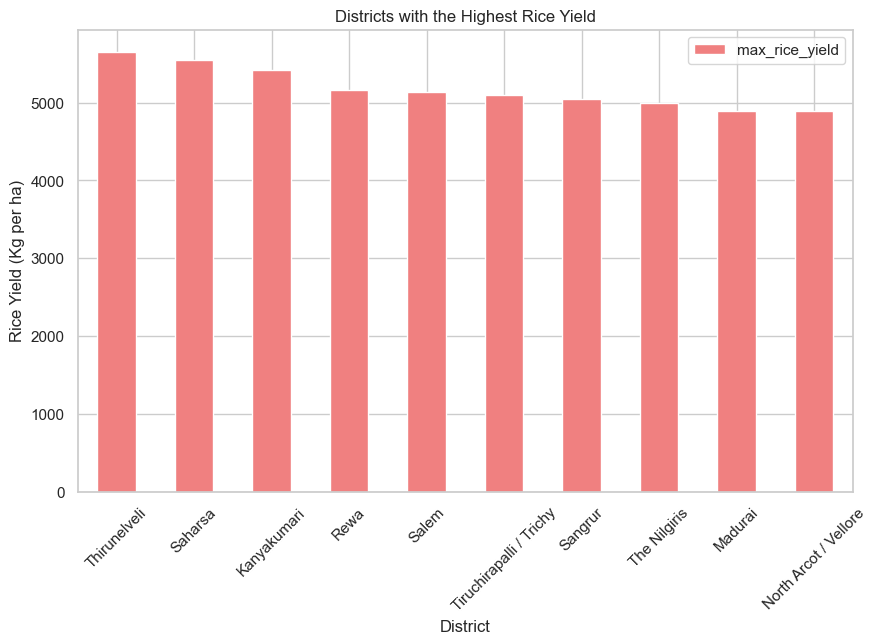

In [39]:
query9 = """
SELECT dist_name, state_name, MAX(rice_yield) AS max_rice_yield
FROM ProductionData
GROUP BY dist_name, state_name
ORDER BY max_rice_yield DESC
LIMIT 10;
"""
df9 = fetch_data(query9)
df9.plot(kind='bar', x='dist_name', y='max_rice_yield', figsize=(10, 6), color='lightcoral')
plt.title('Districts with the Highest Rice Yield')
plt.ylabel('Rice Yield (Kg per ha)')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.show()

---
#### 10. Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years


C:\Users\abish\AppData\Local\Temp\ipykernel_6756\507706098.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


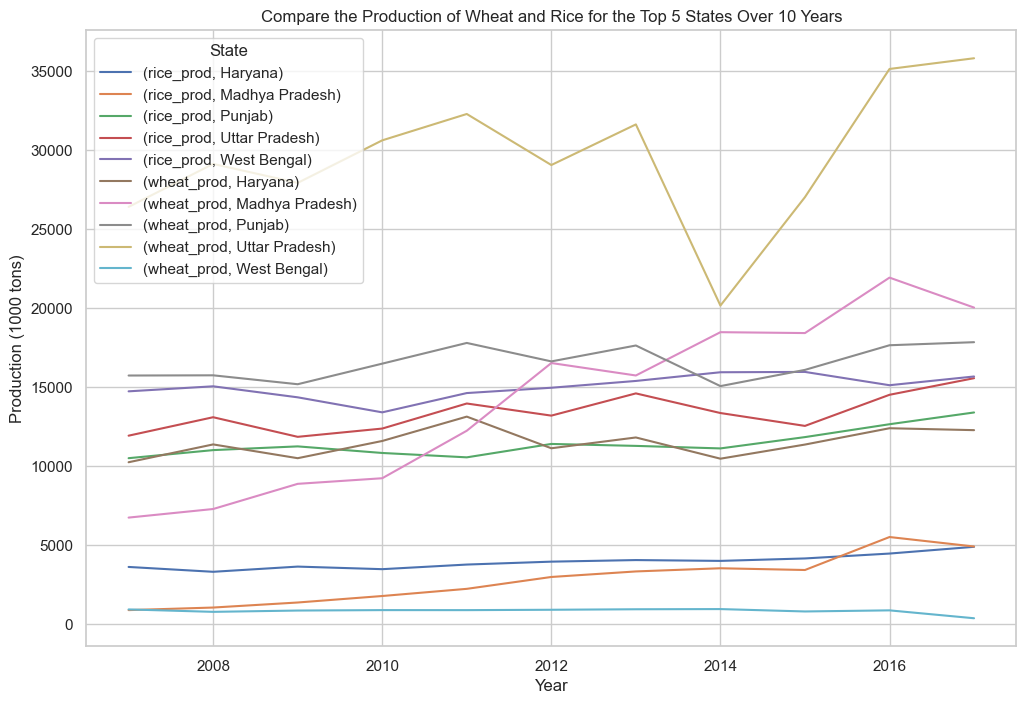

In [40]:
query10 = """
WITH top_states AS (
    SELECT state_name
    FROM ProductionData
    GROUP BY state_name
    ORDER BY SUM(rice_production + wheat_production) DESC
    LIMIT 5
)
SELECT year, state_name, SUM(rice_production) AS rice_prod, SUM(wheat_production) AS wheat_prod
FROM ProductionData
WHERE year >= (SELECT MAX(year) FROM ProductionData) - 10
  AND state_name IN (SELECT state_name FROM top_states)
GROUP BY year, state_name
ORDER BY year, state_name;
"""
df10 = fetch_data(query10)
df10.set_index(['year', 'state_name'], inplace=True)
df10.unstack().plot(kind='line', figsize=(12, 8))
plt.title('Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years')
plt.ylabel('Production (1000 tons)')
plt.xlabel('Year')
plt.legend(title='State')
plt.show()

In [43]:
# Close the connection
conn.close()